**Practica: SVM**

<!DOCTYPE html>
<html lang="es">
<body>
    <h1>Descripción General del Dataset de Marketing Bancario</h1>
    <h2>Características del Dataset</h2>
    <ul>
        <li><strong>Número de Instancias:</strong> 45,211</li>
        <li><strong>Número de Variables:</strong> 17</li>
        <li><strong>Tipos de Variables:</strong>
            <ul>
                <li><strong>Categóricas:</strong> job, marital, education, default, housing, loan, contact, month, poutcome</li>
                <li><strong>Numéricas:</strong> age, balance, day, duration, campaign, pdays, previous</li>
                <li><strong>Variable de salida:</strong> suscrito</li>
            </ul>
        </li>
    </ul>
    <h2>Objetivo</h2>
    <p>El objetivo de la clasificación es predecir si el cliente se suscribirá a un depósito a plazo, basado en las características dadas.</p>
    <h2>Información de las Variables</h2>
    <ol>
        <li><strong>Edad (numérica):</strong> Edad del cliente.</li>
        <li><strong>Trabajo (categórica):</strong> Tipo de trabajo (e.g., 'admin', 'technician').</li>
        <li><strong>Estado civil (categórica):</strong> Estado civil (e.g., 'married', 'single').</li>
        <li><strong>Educación (categórica):</strong> Nivel educativo (e.g., 'primary', 'secondary').</li>
        <li><strong>Default (categórica):</strong> Si tiene crédito en incumplimiento ('yes'/'no').</li>
        <li><strong>Balance (numérica):</strong> Saldo medio anual en euros.</li>
        <li><strong>Vivienda (categórica):</strong> Si tiene préstamo hipotecario ('yes'/'no').</li>
        <li><strong>Préstamo (categórica):</strong> Si tiene préstamo personal ('yes'/'no').</li>
        <li><strong>Contacto (categórica):</strong> Tipo de comunicación de contacto (e.g., 'cellular', 'telephone').</li>
        <li><strong>Día (numérica):</strong> Último día de contacto.</li>
        <li><strong>Mes (categórica):</strong> Último mes de contacto (e.g., 'jan', 'feb').</li>
        <li><strong>Duración (numérica):</strong> Duración del último contacto en segundos.</li>
        <li><strong>Campaña (numérica):</strong> Número de contactos realizados durante esta campaña.</li>
        <li><strong>Pdays (numérica):</strong> Días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior.</li>
        <li><strong>Anterior (numérica):</strong> Número de contactos realizados antes de esta campaña.</li>
        <li><strong>Resultado de la campaña anterior (categórica):</strong> Resultado de la campaña de marketing anterior (e.g., 'success', 'failure').</li>
        <li><strong>Variable de salida (y):</strong> Indica si el cliente se ha suscrito a un depósito a plazo ('yes'/'no').</li>
    </ol>
</body>
</html>


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config
print("Módulos y clases importados")

Módulos y clases importados


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
from sklearn import set_config
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle


print("Módulos y clases importados")

Módulos y clases importados


# 1. Carga y preparación de datos
Carga y descripción del dataset


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar los datos
url = 'https://archive.ics.uci.edu/static/public/222/data.csv'
data = pd.read_csv(url, delimiter=';')

# Ver las columnas del dataset
print(data.columns)


Index(['age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y'], dtype='object')


In [ ]:
import pandas as pd

# Nombres de las variables traducidas
nombresVariables = ['EDAD', 'EMPLEO', 'ESTADOCIVIL', 'EDUCACION', 'DEFAULT', 'BALANCE', 'VIVIENDA', 'PRESTAMO',
                    'CONTACTO', 'DIA_SEMANA', 'MES', 'DURACION', 'CAMPAÑA', 'PDAYS', 'ANTERIOR', 'POUTCOME', 'SUSCRITO']

# Cargar un dataframe desde una URL
dataframe = pd.read_csv('https://archive.ics.uci.edu/static/public/222/data.csv', sep=',', skiprows=1,
                        names=nombresVariables)

print('Cantidad de observaciones (clientes):', dataframe.shape[0])
print('Cantidad de variables:', dataframe.shape[1])
print(dataframe.shape)
dataframe.head()


Cantidad de observaciones (clientes): 45211
Cantidad de variables: 17
(45211, 17)


,EDAD,EMPLEO,ESTADOCIVIL,EDUCACION,DEFAULT,BALANCE,VIVIENDA,PRESTAMO,CONTACTO,DIA_SEMANA,MES,DURACION,CAMPAÑA,PDAYS,ANTERIOR,POUTCOME,SUSCRITO
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


Formato a la variable de salida


In [ ]:
#Se modifica la variable de salida (de estudio): Y. Es mejor tener la salida en formato binario cuando hay dos clases
dataframe['SUSCRITO'] = dataframe['SUSCRITO'].replace({'yes': 1, 'no': 0})
dataframe.head()

,EDAD,EMPLEO,ESTADOCIVIL,EDUCACION,DEFAULT,BALANCE,VIVIENDA,PRESTAMO,CONTACTO,DIA_SEMANA,MES,DURACION,CAMPAÑA,PDAYS,ANTERIOR,POUTCOME,SUSCRITO
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0


Eliminación de variables y separación de variable de salida


In [ ]:
dataframe = dataframe.dropna()

print("Tamaño del conjunto de datos después de eliminar filas con valores NaN:", dataframe.shape)


Tamaño del conjunto de datos después de eliminar filas con valores NaN: (7842, 17)


In [ ]:
# Se separa la variable de salida "Y" para poder realizar la preparación de datos a las variables independientes "X"
Y = dataframe['SUSCRITO']
dataframe = dataframe.drop(['SUSCRITO'], axis=1)

# Se eliminan las columnas que no tienen un gran impacto en la variable de salida 'Y'
dataframe = dataframe.drop(['DIA_SEMANA', 'MES', 'DURACION', 'PDAYS', 'ANTERIOR', 'POUTCOME'], axis=1)

print(dataframe.shape)
dataframe.head()


(7842, 10)


,EDAD,EMPLEO,ESTADOCIVIL,EDUCACION,DEFAULT,BALANCE,VIVIENDA,PRESTAMO,CONTACTO,CAMPAÑA
24060,33,admin.,married,tertiary,no,882,no,no,telephone,1
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,1
24064,33,services,married,secondary,no,3444,yes,no,telephone,1
24072,36,management,married,tertiary,no,2415,yes,no,telephone,1
24077,36,management,married,tertiary,no,0,yes,no,telephone,1


In [ ]:
# Obtener información de todas las variables en el DataFrame
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EDAD         7842 non-null   int64 
 1   EMPLEO       7842 non-null   object
 2   ESTADOCIVIL  7842 non-null   object
 3   EDUCACION    7842 non-null   object
 4   DEFAULT      7842 non-null   object
 5   BALANCE      7842 non-null   int64 
 6   VIVIENDA     7842 non-null   object
 7   PRESTAMO     7842 non-null   object
 8   CONTACTO     7842 non-null   object
 9   CAMPAÑA      7842 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 673.9+ KB


In [ ]:
tamaño = dataframe.shape
print("Tamaño del conjunto de datos:", tamaño)

num_variables = dataframe.shape[1]
num_observaciones = dataframe.shape[0]
print("Cantidad de variables:", num_variables)
print("Cantidad de observaciones:", num_observaciones)

# Tipos de variables
tipos_variables = dataframe.dtypes
print("\nTipos de variables:")
print(tipos_variables)

# Calidad de los datos
# Valores faltantes
valores_faltantes = dataframe.isnull().sum()
print("\nValores faltantes:")
print(valores_faltantes)

# Duplicados
duplicados = dataframe.duplicated().sum()
print("\nCantidad de registros duplicados:", duplicados)

Tamaño del conjunto de datos: (7842, 10)
Cantidad de variables: 10
Cantidad de observaciones: 7842

Tipos de variables:
EDAD            int64
EMPLEO         object
ESTADOCIVIL    object
EDUCACION      object
DEFAULT        object
BALANCE         int64
VIVIENDA       object
PRESTAMO       object
CONTACTO       object
CAMPAÑA         int64
dtype: object

Valores faltantes:
EDAD           0
EMPLEO         0
ESTADOCIVIL    0
EDUCACION      0
DEFAULT        0
BALANCE        0
VIVIENDA       0
PRESTAMO       0
CONTACTO       0
CAMPAÑA        0
dtype: int64

Cantidad de registros duplicados: 315


In [ ]:
valores_faltantes = dataframe.isnull().sum()
print("\nValores faltantes:")
print(valores_faltantes)

tamaño = dataframe.shape
print("Tamaño del conjunto de datos:", tamaño)

num_variables = dataframe.shape[1]
num_observaciones = dataframe.shape[0]
print("Cantidad de variables:", num_variables)
print("Cantidad de observaciones:", num_observaciones)


Valores faltantes:
EDAD           0
EMPLEO         0
ESTADOCIVIL    0
EDUCACION      0
DEFAULT        0
BALANCE        0
VIVIENDA       0
PRESTAMO       0
CONTACTO       0
CAMPAÑA        0
dtype: int64
Tamaño del conjunto de datos: (7842, 10)
Cantidad de variables: 10
Cantidad de observaciones: 7842


Datos del cliente del banco:

1 - edad (numérica)

2 - ocupación: tipo de trabajo (categórica: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - estado civil: estado civil (categórica: "married","divorced","single"; nota: "divorced" significa divorciado o viudo)

4 - educación (categórica: "unknown","secondary","primary","tertiary")

5 - default: ¿tiene crédito en incumplimiento? (binaria: "sí","no")

6 - saldo: saldo promedio anual, en euros (numérica)

7 - vivienda: ¿tiene préstamo hipotecario? (binaria: "sí","no")

8 - préstamo: ¿tiene préstamo personal? (binaria: "sí","no")

relacionadas con el último contacto de la campaña actual:

9 - contacto: tipo de comunicación de contacto (categórica: "unknown","telephone","cellular")

10 - día: día del último contacto del mes (numérica)

11 - mes: mes del último contacto del año (categórica: "jan", "feb", "mar", ..., "nov", "dec")

12 - duración: duración del último contacto, en segundos (numérica)

otras atributos:

13 - campaña: número de contactos realizados durante esta campaña y para este cliente (numérica, incluye el último contacto)

14 - pdays: número de días transcurridos desde que el cliente fue contactado por última vez en una campaña anterior (numérica, -1 significa que el cliente no fue contactado previamente)

15 - anterior: número de contactos realizados antes de esta campaña y para este cliente (numérica)

16 - resultado_previo: resultado de la campaña de marketing anterior (categórica: "unknown","other","failure","success")

Variable de salida (objetivo deseado):

17 - Y - ¿el cliente se ha suscrito a un depósito a plazo? (binaria: "sí","no")





In [ ]:
dataframe.describe()

,EDAD,BALANCE,CAMPAÑA
count,7842.000000,7842.000000,7842.000000
mean,40.783856,1552.343280,2.064269
std,11.282964,3084.580003,1.566109
min,18.000000,-1884.000000,1.000000
25%,32.000000,162.000000,1.000000
50%,38.000000,595.000000,2.000000
75%,47.000000,1733.750000,2.000000
max,89.000000,81204.000000,16.000000


<ipython-input-79-9e365b2c5f48>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['No suscrito (0)', 'Suscrito (1)'])


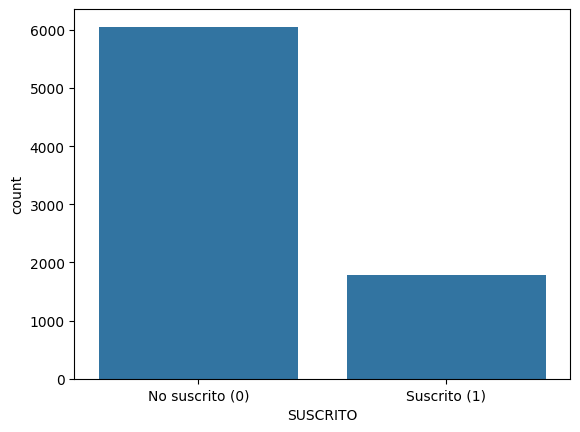

In [ ]:
# Generar una figura de frecuencia de clase, es decir, la cantidad de muestras en cada clase.
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de frecuencia de clase
sns.countplot(x=Y)

# Establecer las etiquetas del eje x
plt.gca().set_xticklabels(['No suscrito (0)', 'Suscrito (1)'])

# Mostrar el gráfico
plt.show()


Análisis de variables categóricas


In [ ]:
categorical_ordinal_features =['EDUCACION']
categorical_nominal_features = ['EMPLEO', 'ESTADOCIVIL', 'DEFAULT', 'VIVIENDA', 'PRESTAMO', 'CONTACTO']
numeric_features = ['EDAD', 'BALANCE', 'CAMPAÑA']


In [ ]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns)
    print('Cantidad de variables antes de transformación de variables: ', cantidadTotalVariables)

    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias = 0

    for variable in categorical_nominal_features:
        cantidadCategorias = dataframe[variable].nunique()
        cantidadVariablesBinarias += cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal', variable, ':', cantidadCategorias)

    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ', cantidadVariablesBinarias)

    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [ ]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  10
Cantidad de categorías en la variable categórica nominal EMPLEO : 11
Cantidad de categorías en la variable categórica nominal ESTADOCIVIL : 3
Cantidad de categorías en la variable categórica nominal DEFAULT : 2
Cantidad de categorías en la variable categórica nominal VIVIENDA : 2
Cantidad de categorías en la variable categórica nominal PRESTAMO : 2
Cantidad de categorías en la variable categórica nominal CONTACTO : 2
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  22
Cantidad de variables que habrá después de la transformación de variables:  26


Diseño de transformadores


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Definición de transformadores (preprocesadores)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ], remainder='passthrough', n_jobs=-1
)

# Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True, with_std=True))
])
preprocesorStandardScaler = ColumnTransformer(transformers=[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder='passthrough')

# Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    ('prepstandard', preprocesorStandardScaler)
])

# Se ejecuta el pipeline
dataframeTransformado = copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)

print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])

# Formación de DataFrame transformado
cnamesDataset1 = []
if len(categorical_ordinal_features) != 0:
    cnamesDataset1.extend(categorical_ordinal_features)

if len(categorical_nominal_features) != 0:
    # Nos ubicamos primeramente en el paso "prepcn", luego en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1]
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)

cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)

print('********** Cantidad de variables:', len(cnamesDataset1))
print('********** Lista de variables:')
print(cnamesDataset1)

# Convertir el resultado transformado en un DataFrame
dataframeTransformado = pd.DataFrame(data=X_Transformado, columns=cnamesDataset1)

# Guardar el dataset sin etiquetas como CSV
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";", index=False)

# Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y.reset_index(drop=True)], axis=1)

# Guardar el dataset con etiquetas como CSV
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";", index=False)
dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]), ['EMPLEO', 'ESTADOCIVIL', 'DEFAULT', 'VIVIENDA', 'PRESTAMO', 'CONTACTO'])
********** Cantidad de variables: 26
********** Lista de variables:
['EDUCACION', 'EMPLEO_admin.', 'EMPLEO_blue-collar', 'EMPLEO_entrepreneur', 'EMPLEO_housemaid', 'EMPLEO_management', 'EMPLEO_retired', 'EMPLEO_self-employed', 'EMPLEO_services', 'EMPLEO_student', 'EMPLEO_technician', 'EMPLEO_unemployed', 'ESTADOCIVIL_divorced', 'ESTADOCIVIL_married', 'ESTADOCIVIL_single', 'DEFAULT_no', 'DEFAULT_yes', 'VIVIENDA_no', 'VIVIENDA_yes', 'PRESTAMO_no', 'PRESTAMO_yes', 'CONTACTO_cellular', 'CONTACTO_telephone', 'EDAD', 'BALANCE', 'CAMPAÑA']


,EDUCACION,EMPLEO_admin.,EMPLEO_blue-collar,EMPLEO_entrepreneur,EMPLEO_housemaid,EMPLEO_management,EMPLEO_retired,EMPLEO_self-employed,EMPLEO_services,EMPLEO_student,...,VIVIENDA_no,VIVIENDA_yes,PRESTAMO_no,PRESTAMO_yes,CONTACTO_cellular,CONTACTO_telephone,EDAD,BALANCE,CAMPAÑA,SUSCRITO
0,1.221062,2.533596,-0.493736,-0.166284,-0.137735,-0.536560,-0.24905,-0.186649,-0.308628,-0.176532,...,1.305426,-1.305426,0.401574,-0.401574,-3.522091,3.522091,-0.689921,-0.217335,-0.679606,0
1,-0.318171,2.533596,-0.493736,-0.166284,-0.137735,-0.536560,-0.24905,-0.186649,-0.308628,-0.176532,...,-0.766033,0.766033,-2.490201,2.490201,-3.522091,3.522091,0.107793,-0.583372,-0.679606,1
2,-0.318171,-0.394696,-0.493736,-0.166284,-0.137735,-0.536560,-0.24905,-0.186649,3.240144,-0.176532,...,-0.766033,0.766033,0.401574,-0.401574,-3.522091,3.522091,-0.689921,0.613301,-0.679606,1
3,1.221062,-0.394696,-0.493736,-0.166284,-0.137735,1.863726,-0.24905,-0.186649,-0.308628,-0.176532,...,-0.766033,0.766033,0.401574,-0.401574,-3.522091,3.522091,-0.424016,0.279685,-0.679606,0
4,1.221062,-0.394696,-0.493736,-0.166284,-0.137735,1.863726,-0.24905,-0.186649,-0.308628,-0.176532,...,-0.766033,0.766033,0.401574,-0.401574,-3.522091,3.522091,-0.424016,-0.503291,-0.679606,1


In [ ]:
print("Cantidad de pasos: ", len(pipe.steps))
print(pipe.steps)


Cantidad de pasos:  2
[('prepcn', ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('catord',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['EDUCACION']),
                                ('catnom',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['EMPLEO', 'ESTADOCIVIL', 'DEFAULT',
                                  'VIVIENDA', 'PRESTAMO', 'CONTACTO'])])), ('prepstandard', ColumnTransformer(remainder='passthrough',
                  transformers=[('transcaler',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
 

In [ ]:
# Funciones para guardar y cargar un Pipeline o Modelo
import pickle
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
guardarPipeline(pipe,'pipePreprocesadores')

# 2. Desarrollo y optimización de modelos


Carga de pipeline de preparación del conjunto de datos


In [ ]:
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo + '.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    print(f"Pipeline cargado desde {nombreArchivo}.pickle")
    return pipeline


In [ ]:
nombreArchivoPreprocesador='pipePreprocesadores'
pipe=None
pipe=cargarPipeline(nombreArchivoPreprocesador) #Debes incluir el archivo del Pipeline en el mismo directorio del script
cantidadPasos=len(pipe.steps)
print("Cantidad de pasos: ",cantidadPasos)
set_config(display='diagram')
pipe

Pipeline cargado desde pipePreprocesadores.pickle
Cantidad de pasos:  2


/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['EDUCACION']),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['EMPLEO', 'ESTADOCIVIL',
                                                   'DEFAULT', 'VIVIENDA',
                                                   'PRESTAMO', 'CONTACTO'])])),
                ('prepstandard',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25])]))])

In [ ]:
dfCorrel=dataframeTransformado.corr()
dfCorrel.head()

,EDUCACION,EMPLEO_admin.,EMPLEO_blue-collar,EMPLEO_entrepreneur,EMPLEO_housemaid,EMPLEO_management,EMPLEO_retired,EMPLEO_self-employed,EMPLEO_services,EMPLEO_student,...,VIVIENDA_no,VIVIENDA_yes,PRESTAMO_no,PRESTAMO_yes,CONTACTO_cellular,CONTACTO_telephone,EDAD,BALANCE,CAMPAÑA,SUSCRITO
EDUCACION,1.000000,-0.060057,-0.418163,0.047775,-0.071413,0.529381,-0.139505,0.104938,-0.110038,-0.004574,...,0.116914,-0.116914,0.030710,-0.030710,0.097806,-0.097806,-0.180317,0.079308,-0.027096,0.109902
EMPLEO_admin.,-0.060057,1.000000,-0.194875,-0.065632,-0.054363,-0.211778,-0.098299,-0.073669,-0.121814,-0.069677,...,-0.026208,0.026208,-0.034789,0.034789,0.026790,-0.026790,-0.059361,-0.050200,-0.032413,-0.000650
EMPLEO_blue-collar,-0.418163,-0.194875,1.000000,-0.082100,-0.068005,-0.264919,-0.122965,-0.092155,-0.152381,-0.087160,...,-0.214524,0.214524,-0.026531,0.026531,-0.007754,0.007754,-0.061551,-0.062723,0.051122,-0.135615
EMPLEO_entrepreneur,0.047775,-0.065632,-0.082100,1.000000,-0.022903,-0.089221,-0.041413,-0.031037,-0.051320,-0.029355,...,-0.029431,0.029431,-0.051729,0.051729,-0.009777,0.009777,0.020788,-0.020198,0.012299,-0.043323
EMPLEO_housemaid,-0.071413,-0.054363,-0.068005,-0.022903,1.000000,-0.073903,-0.034303,-0.025708,-0.042509,-0.024315,...,0.062551,-0.062551,0.019846,-0.019846,-0.029115,0.029115,0.087677,0.007234,0.003384,-0.002815


<Axes: >

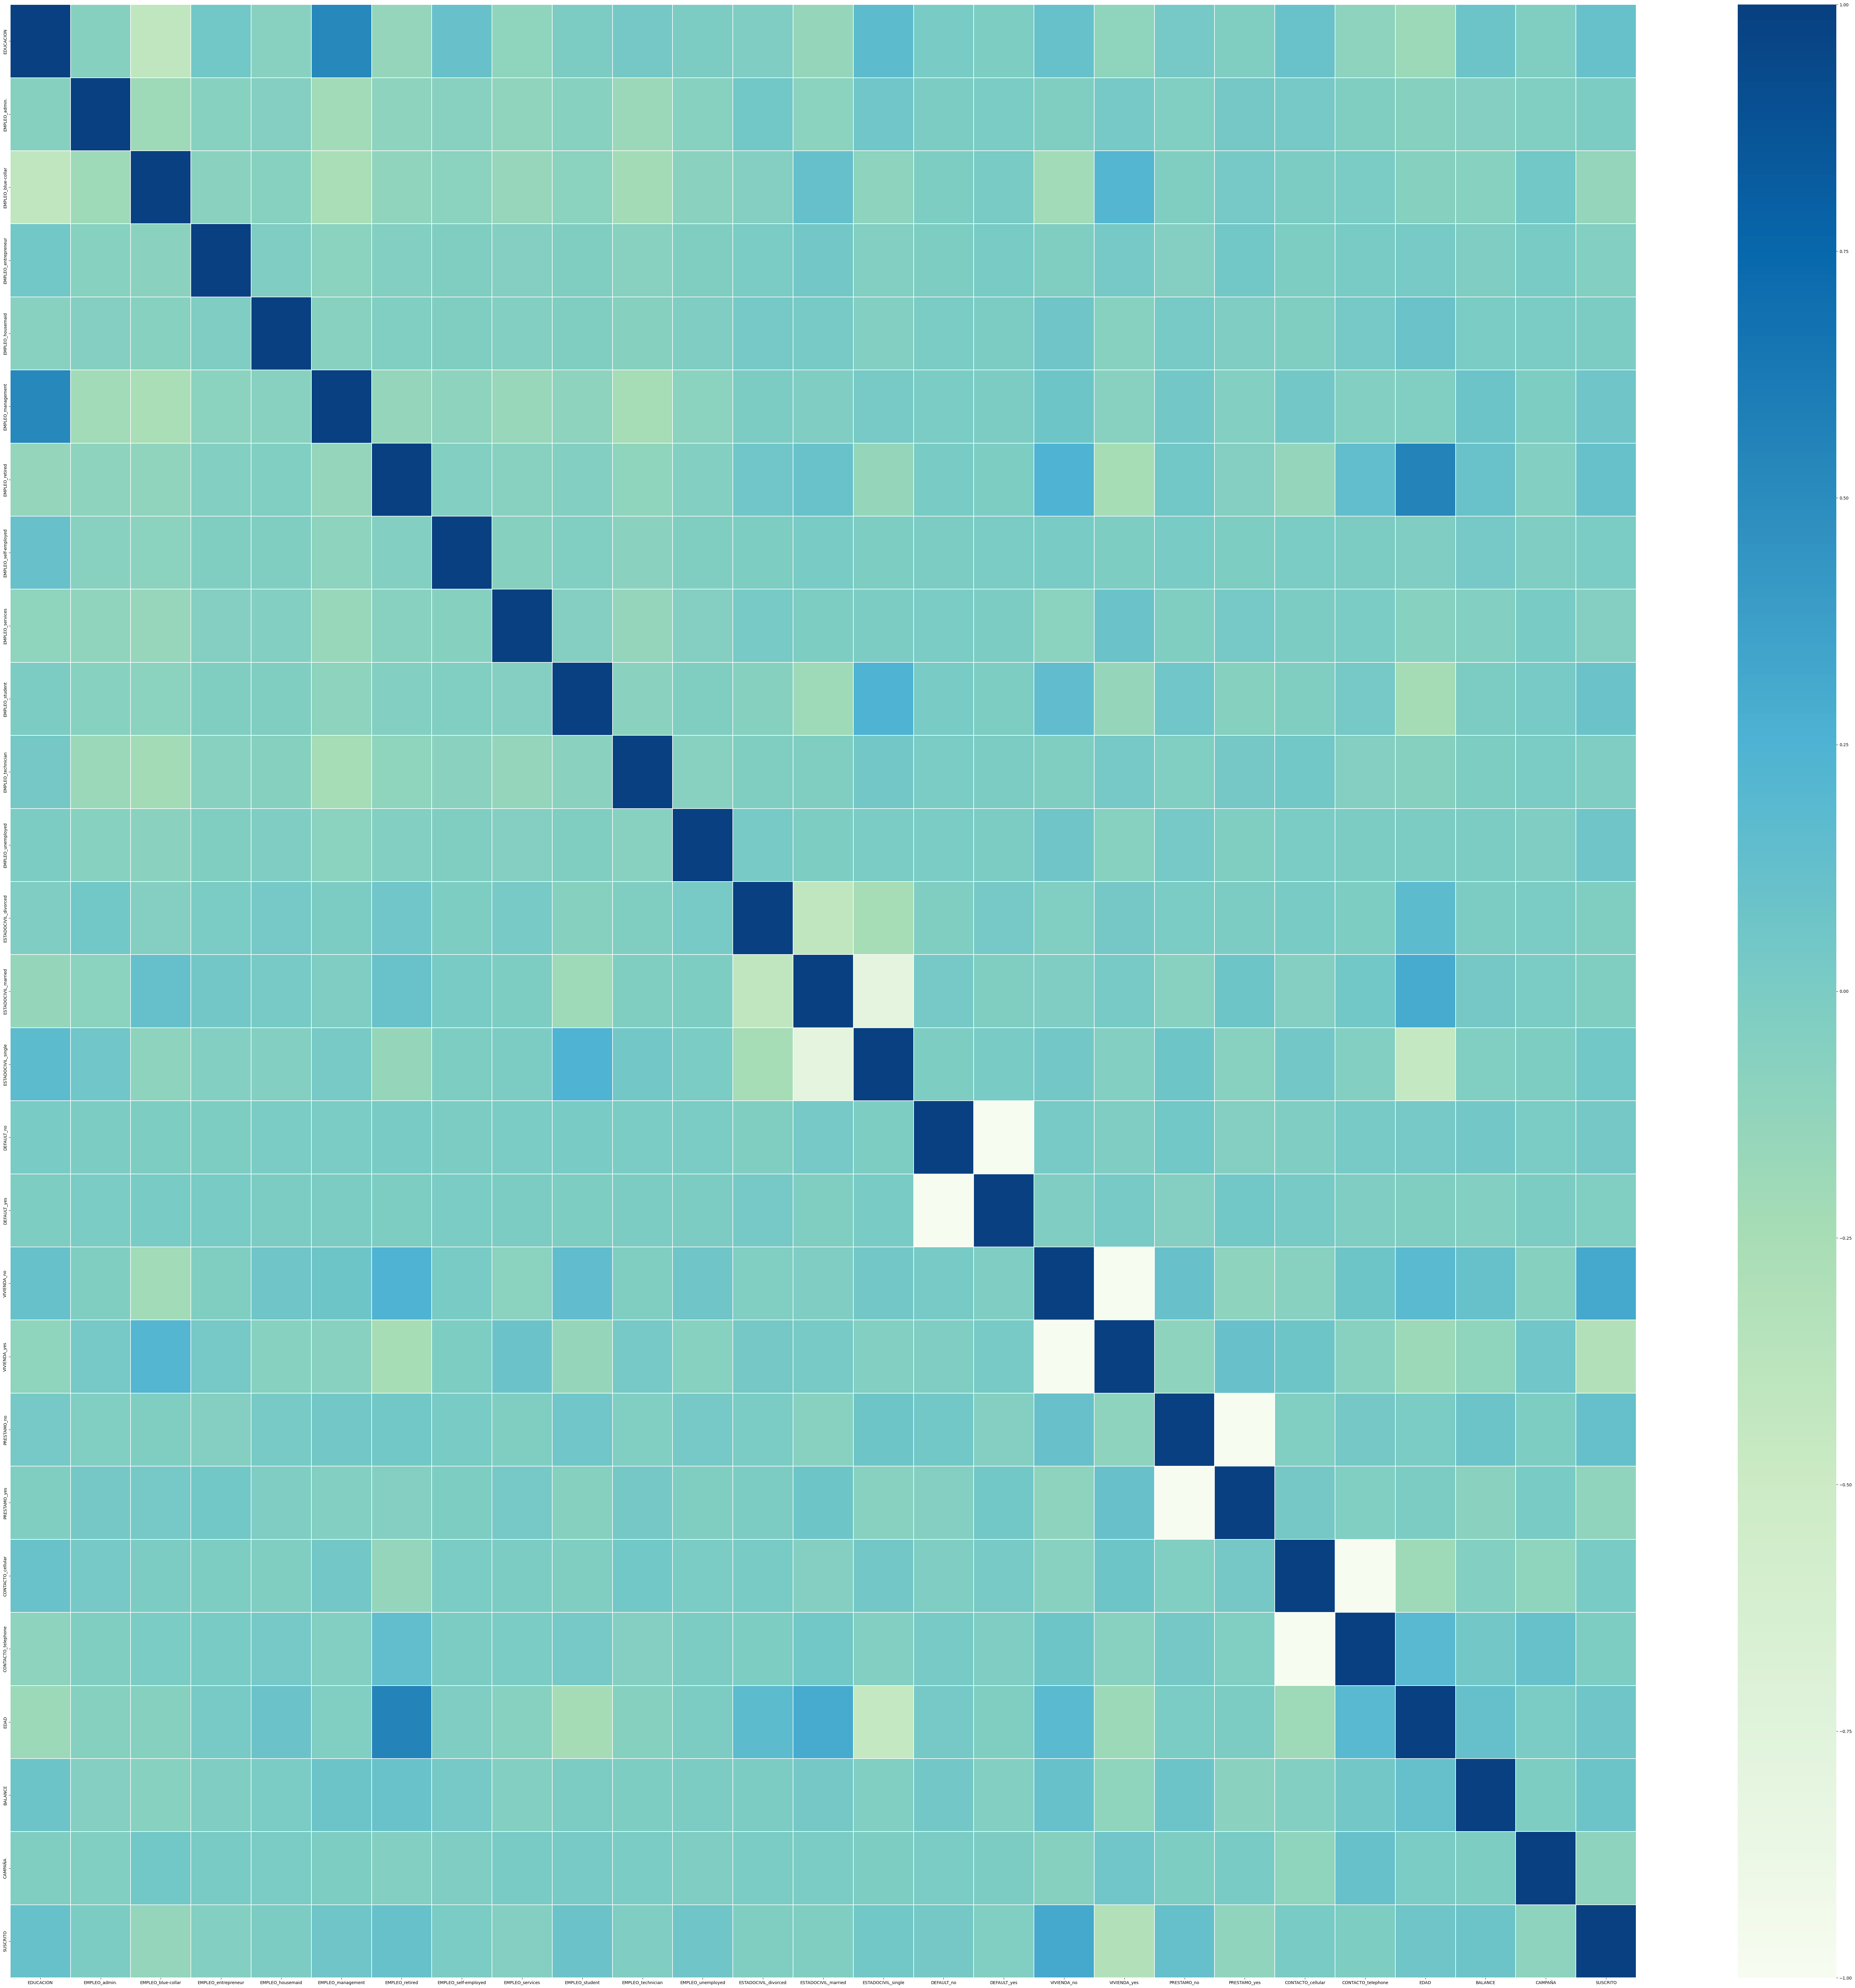

In [ ]:
#Un mapa de calor personalizado: colores, tamaño
fig, ax = plt.subplots(figsize = (87, 85))
#sns.heatmap(cr, cmap ='viridis', linewidths = 0.03, annot = True)
sns.heatmap(dfCorrel, cmap ='GnBu', linewidths = 0.03, annot = False)

**Creación del SVM**

In [ ]:
def guardarObjeto(pipeline, nombreArchivo):
    print("Guardando Objeto en Archivo")
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Objeto Guardado en Archivo")

def cargarObjeto(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
        print("Objeto Cargado desde Archivo")
    return pipeline

# Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model, nombreArchivo):
    print("Guardando Red Neuronal en Archivo")
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Guardada en Archivo")

def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')
    print("Red Neuronal Cargada desde Archivo")
    return model

Entrenamiento del Modelo


In [ ]:
Yval = Y.values
dataframeTransformado = copy.deepcopy(dataframeTransformado)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataframeTransformado, Yval, test_size=0.2, random_state=0)

Predicción con modelo base y evaluación de calidad: MAE, MSE, RMSE, Accuracy, Precision, Recall y F1

In [ ]:
# Entrenamiento del clasificador SVM
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifierSVM = SVC(gamma=0.001, kernel='poly', C=1.0, verbose=True)

# Asegurarse de que X_train esté en el formato adecuado
X_train_np = X_train.values.reshape(X_train.shape[0], -1)

classifierSVM.fit(X_train_np, y_train)

# Asegurarse de que X_test esté en el formato adecuado
X_test_np = X_test.values.reshape(X_test.shape[0], -1)

# Predicciones en el conjunto de prueba
y_pred = classifierSVM.predict(X_test_np)

# Cálculo de la precisión
acc_svm = accuracy_score(y_test, y_pred)
print('\nSVM Accuracy: ', acc_svm)

# Función para obtener métricas
def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    # La puntuación de especificidad no está directamente disponible en sklearn.metrics, podría necesitar implementarla por separado

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)
    # print("Specificity:", specificity)  # Descomenta si la función specificity_score está definida

    return accuracy, precision, recall, f1

resultados_svm = obtenerResultados(y_test, y_pred)

# Suponiendo que guardarObjeto guarda el clasificador SVM entrenado en un archivo específico
guardarObjeto(classifierSVM, 'classifierSVM')

SVM Classifier with gamma = 0.1; Kernel = Polynomial
[LibSVM]
SVM Accuracy:  0.7648183556405354
Accuracy: 0.7648183556405354
Precision: 0.3824091778202677
Recall o Sensitivity: 0.5
F1-Score: 0.4333694474539545
Guardando Objeto en Archivo
Objeto Guardado en Archivo


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
import numpy as np

# Suponiendo que dataframeTransformado es tu DataFrame transformado
# y classifierSVM es tu modelo SVM ya entrenado y usado para predecir
# en X_test transformado.

# Predicciones en el conjunto de prueba transformado
y_pred_transformado = classifierSVM.predict(X_test_np)

# Crear el DataFrame dataframeFinal con 'real' (valores reales) y 'predicción' (valores predichos)
dataframeFinal = pd.DataFrame({'real': y_test, 'predicción': y_pred_transformado})

# Establecer opciones de impresión de numpy para imprimir enteros
np.set_printoptions(formatter={'float': lambda x: "{0:0.0f}".format(x)})

# Mostrar las primeras 20 filas del dataframeFinal
print(dataframeFinal.head(20))


    real  predicción
0      0           0
1      0           0
2      0           0
3      1           0
4      0           0
5      0           0
6      0           0
7      1           0
8      0           0
9      1           0
10     0           0
11     1           0
12     0           0
13     1           0
14     1           0
15     0           0
16     1           0
17     0           0
18     0           0
19     0           0


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)
print('Mean Squared Error (MSE):', MSE)
print('Root Mean Squared Error (RMSE):', RMSE)
print('Accuracy: ' + accuracy)

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)
print(cm)
tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()
print(tn,fp,fn,tp)

precision=precision_score(y_test_transformado, y_pred_transformado)
precision=str(round(precision, 4))
print('Precision:',precision)

recall=recall_score(y_test_transformado, y_pred_transformado)
recall=str(round(recall, 4))
print('Recall:',recall)

f1=f1_score(y_test_transformado, y_pred_transformado)
f1=str(round(f1, 4))
print('F1:',f1)

Mean Absolute Error (MAE): 0.2352
Mean Squared Error (MSE): 0.2352
Root Mean Squared Error (RMSE): 0.485
Accuracy: 0.7648183556405354
Confusion_matrix:
[[1200    0]
 [ 369    0]]
1200 0 369 0
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Optimización del modelo SVM (Fine Tuning)

In [ ]:
from time import time
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Ejemplo de carga de datos (ajústalo según tus datos reales)
X_train, X_test, y_train, y_test = train_test_split(dataframeTransformado, Y, test_size=0.2, random_state=0)

# Rango de parámetros para la búsqueda
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Definir el modelo SVM
modelSVM = SVC()

# Definir GridSearchCV con el modelo SVM, la rejilla de parámetros y la cantidad de folds con cv
gs = GridSearchCV(estimator=modelSVM, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Definir un tiempo de inicio para medir la duración de GridSearchCV
tic = time()

# Ejecutar los experimentos
gs.fit(X_train, y_train)

# Calcular el tiempo total de GridSearchCV
gs_time = time() - tic

# Mostrar resultados
print(f"Tiempo total de GridSearchCV: {gs_time:.2f} segundos")
print("Mejores parámetros encontrados:")
print(gs.best_params_)
print("Mejor score obtenido:")
print(gs.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Tiempo total de GridSearchCV: 65.71 segundos
Mejores parámetros encontrados:
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Mejor score obtenido:
1.0


Optimización con GridSearch


In [ ]:
print(gs)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)


In [ ]:
print(f"Mejores parámetros:")
print(gs.best_params_)

print(("\nMedia del score (accuracy) del modelo de grid search: %.3f"
       % gs.score(X_test, y_test)))

Mejores parámetros:
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

Media del score (accuracy) del modelo de grid search: 1.000


In [ ]:
print(f"Mejor score: {gs.best_score_:.3f}")


Mejor score: 1.000


Visualización de resultados con Heatmap


In [ ]:
import pandas as pd

# Change the name of your DataFrame variable to avoid conflicts
results_df = pd.DataFrame(gs.cv_results_)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037559,0.002650,0.017620,0.003588,0.1,1.0,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,0.000000,1
1,1.597713,0.137816,0.812910,0.018483,0.1,1.0,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.811573,0.812530,0.806313,0.810139,0.002733,41
2,0.649453,0.024351,0.058975,0.000551,0.1,1.0,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",1.000000,0.999522,1.000000,0.999841,0.000225,19
3,0.032975,0.010353,0.017580,0.002937,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",1.000000,1.000000,1.000000,1.000000,0.000000,1
4,1.173466,0.006536,0.665433,0.017887,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.879005,0.902439,0.891918,0.891121,0.009583,39


In [ ]:
# Ordenar resultados por mean_test_score en orden descendente
results_df = results_df.sort_values("mean_test_score", ascending=False)

# Seleccionar columnas específicas para mostrar
columns_to_show = [
    "mean_test_score",
    "std_test_score",
    "param_C",
    "param_gamma",
    "param_kernel"
]

# Mostrar los primeros 20 resultados ordenados y las columnas seleccionadas
print(results_df[columns_to_show].head(20))


    mean_test_score  std_test_score  param_C  param_gamma param_kernel
0          1.000000        0.000000      0.1        1.000       linear
15         1.000000        0.000000      1.0        0.100       linear
46         1.000000        0.000000    100.0        0.001          rbf
45         1.000000        0.000000    100.0        0.001       linear
42         1.000000        0.000000    100.0        0.010       linear
39         1.000000        0.000000    100.0        0.100       linear
36         1.000000        0.000000    100.0        1.000       linear
34         1.000000        0.000000     10.0        0.001          rbf
33         1.000000        0.000000     10.0        0.001       linear
30         1.000000        0.000000     10.0        0.010       linear
27         1.000000        0.000000     10.0        0.100       linear
21         1.000000        0.000000      1.0        0.001       linear
18         1.000000        0.000000      1.0        0.010       linear
24    

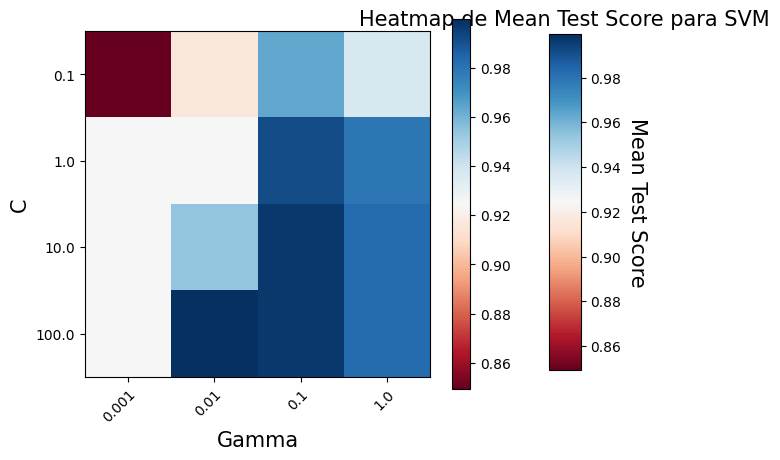

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def make_heatmap(ax, results_df, make_cbar=False, cmap='GnBu'):
    scores_matrix = pd.pivot_table(data=results_df,
                                   index='param_C',
                                   columns='param_gamma',
                                   values='mean_test_score')

    im = ax.imshow(scores_matrix, cmap=cmap)

    ax.set_xticks(np.arange(len(scores_matrix.columns)))
    ax.set_xticklabels(scores_matrix.columns)
    ax.set_xlabel('Gamma', fontsize=15)

    ax.set_yticks(np.arange(len(scores_matrix.index)))
    ax.set_yticklabels(scores_matrix.index)
    ax.set_ylabel('C', fontsize=15)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel('Mean Test Score', rotation=-90, va="bottom", fontsize=15)

    return im


# Crear figura y ejes para el heatmap
fig, ax = plt.subplots()
im = make_heatmap(ax, results_df, make_cbar=True, cmap='RdBu')

# Configurar colorbar y título
fig.colorbar(im)
plt.title('Heatmap de Mean Test Score para SVM', fontsize=15)

plt.show()

Creación de Modelo Optimizado


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataframeTransformado, Y, test_size=0.2, random_state=0)

# Definir y configurar el clasificador SVM optimizado
print('SVM Classifier with gamma = 0.1; Kernel = Linear')
classifierSVM = SVC(gamma=0.1, kernel='linear', C=1.0, verbose=True)

# Entrenar el clasificador SVM
classifierSVM.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifierSVM.predict(X_test)

# Cálculo de métricas de evaluación
def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)

    return accuracy, precision, recall, f1

resultados_svm = obtenerResultados(y_test, y_pred)

# Suponiendo que guardarObjeto guarda el clasificador SVM entrenado en un archivo específico
guardarObjeto(classifierSVM, 'classifierSVM')


SVM Classifier with gamma = 0.1; Kernel = Linear
[LibSVM]Accuracy: 1.0
Precision: 1.0
Recall o Sensitivity: 1.0
F1-Score: 1.0
Guardando Objeto en Archivo
Objeto Guardado en Archivo


# 3. Justificación de predicciones

Matriz de confusión normalizada


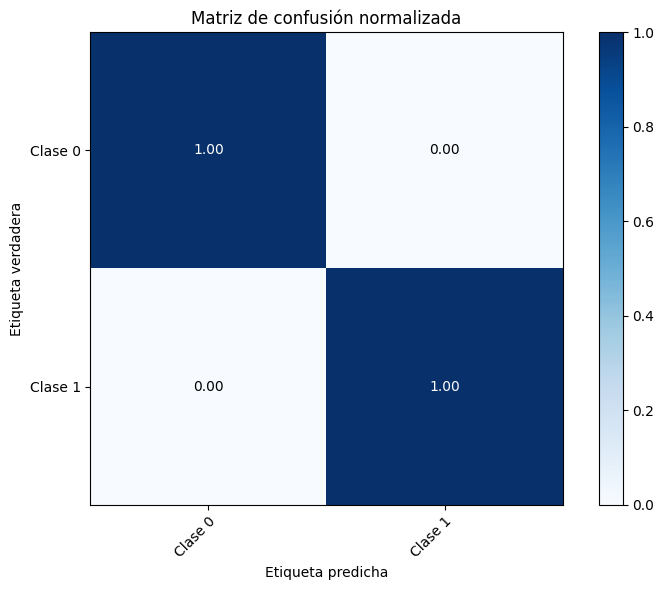

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y dibuja la matriz de confusión.
    Se pueden normalizar los valores dividiendo las predicciones por el número total de muestras.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusión normalizada'
        else:
            title = 'Matriz de confusión sin normalizar'

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Opcional: normalizar la matriz de confusión por fila
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión sin normalizar')

    # Imprimir la matriz de confusión
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta verdadera',
           xlabel='Etiqueta predicha')

    # Rotar las etiquetas y ajustar su alineación
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Añadir anotaciones de texto en cada celda
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax


# Ejemplo de uso:
# Suponiendo que tienes y_test (etiquetas verdaderas) y y_pred (etiquetas predichas) del clasificador SVM
# y clases 'Clase 0' y 'Clase 1'

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=['Clase 0', 'Clase 1'], normalize=True, title='Matriz de confusión normalizada')
plt.show()


In [ ]:
print(dataframe.head())
print(dataframe.columns)

       EDAD      EMPLEO ESTADOCIVIL  EDUCACION DEFAULT  BALANCE VIVIENDA  \
24060    33      admin.     married   tertiary      no      882       no   
24062    42      admin.      single  secondary      no     -247      yes   
24064    33    services     married  secondary      no     3444      yes   
24072    36  management     married   tertiary      no     2415      yes   
24077    36  management     married   tertiary      no        0      yes   

      PRESTAMO   CONTACTO  CAMPAÑA  
24060       no  telephone        1  
24062      yes  telephone        1  
24064       no  telephone        1  
24072       no  telephone        1  
24077       no  telephone        1  
Index(['EDAD', 'EMPLEO', 'ESTADOCIVIL', 'EDUCACION', 'DEFAULT', 'BALANCE',
       'VIVIENDA', 'PRESTAMO', 'CONTACTO', 'CAMPAÑA'],
      dtype='object')


Index(['EDUCACION', 'EMPLEO_admin.', 'EMPLEO_blue-collar',
       'EMPLEO_entrepreneur', 'EMPLEO_housemaid', 'EMPLEO_management',
       'EMPLEO_retired', 'EMPLEO_self-employed', 'EMPLEO_services',
       'EMPLEO_student', 'EMPLEO_technician', 'EMPLEO_unemployed',
       'ESTADOCIVIL_divorced', 'ESTADOCIVIL_married', 'ESTADOCIVIL_single',
       'DEFAULT_no', 'DEFAULT_yes', 'VIVIENDA_no', 'VIVIENDA_yes',
       'PRESTAMO_no', 'PRESTAMO_yes', 'CONTACTO_cellular',
       'CONTACTO_telephone', 'EDAD', 'BALANCE', 'CAMPAÑA', 'SUSCRITO'],
      dtype='object')
               Feature  Correlation
17         VIVIENDA_no     0.318413
18        VIVIENDA_yes     0.318413
2   EMPLEO_blue-collar     0.135615
20        PRESTAMO_yes     0.117840
19         PRESTAMO_no     0.117840
6       EMPLEO_retired     0.113703
0            EDUCACION     0.109902
25             CAMPAÑA     0.095488
9       EMPLEO_student     0.088848
24             BALANCE     0.079133


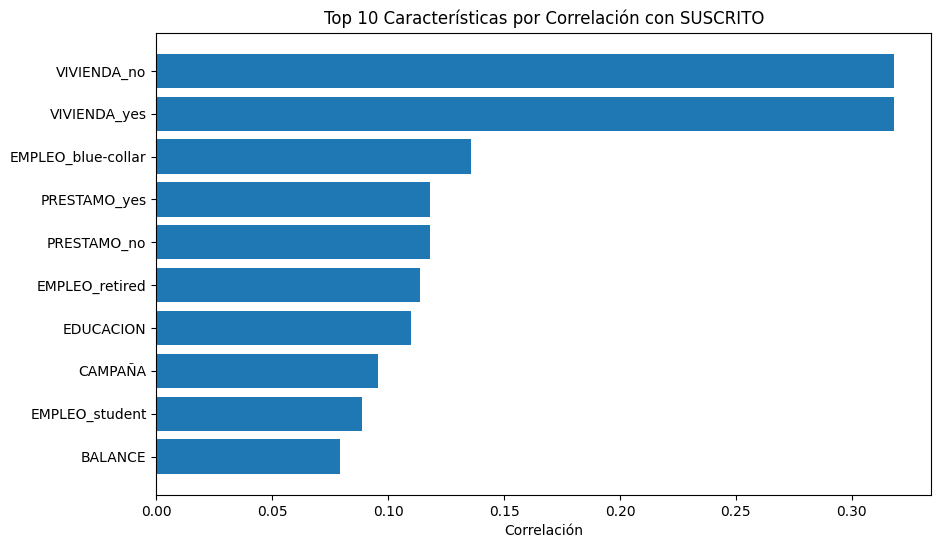

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def visualizar_variables_importantes_correlacion(dataframe, target_column, n=10):
    """
    Visualiza las características más importantes según su correlación con la variable objetivo.

    Parámetros:
    - dataframe: DataFrame que contiene todas las características y la variable objetivo.
    - target_column: Nombre de la columna de la variable objetivo.
    - n: Número de características más importantes para mostrar.
    """
    # Calcular la correlación de cada característica con la variable objetivo
    correlations = {}
    features = dataframe.drop(columns=[target_column])
    target = dataframe[target_column]

    for feature in features.columns:
        # Asegurarse de que la característica es numérica antes de calcular la correlación
        if pd.api.types.is_numeric_dtype(features[feature]):
            corr, _ = pearsonr(features[feature], target)
            correlations[feature] = np.abs(corr)

    # Crear un DataFrame con las características y sus correlaciones
    feature_correlations = pd.DataFrame({
        'Feature': list(correlations.keys()),
        'Correlation': list(correlations.values())
    })

    # Ordenar el DataFrame por correlación descendente
    feature_correlations = feature_correlations.sort_values(by='Correlation', ascending=False)

    # Mostrar las n características más importantes según la correlación
    print(feature_correlations.head(n))

    # Visualización de las n características más importantes según la correlación
    plt.figure(figsize=(10, 6))
    plt.barh(feature_correlations.head(n)['Feature'], feature_correlations.head(n)['Correlation'])
    plt.gca().invert_yaxis()
    plt.xlabel('Correlación')
    plt.title(f'Top {n} Características por Correlación con {target_column}')
    plt.show()

# Asegurarte de que 'SUSCRITO' esté en el DataFrame antes de llamarla función
# Añadir la columna 'SUSCRITO' al DataFrame transformado
dataframeTransformado['SUSCRITO'] = Y.reset_index(drop=True)

# Verifica que la columna 'SUSCRITO' esté en el DataFrame
print(dataframeTransformado.columns)

# Llamada a la función para visualizar las características más importantes por correlación con 'SUSCRITO'
visualizar_variables_importantes_correlacion(dataframeTransformado, 'SUSCRITO', n=10)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataframeTransformado, Y, test_size=0.2, random_state=0)

# Definir y configurar el clasificador SVM optimizado
print('SVM Classifier with gamma = 0.1; Kernel = Linear')
classifierSVM = SVC(gamma=0.1, kernel='linear', C=1.0, verbose=True)

# Entrenar el clasificador SVM
classifierSVM.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifierSVM.predict(X_test)

# Cálculo de métricas de evaluación
def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)

    return accuracy, precision, recall, f1

resultados_svm = obtenerResultados(y_test, y_pred)




SVM Classifier with gamma = 0.1; Kernel = Linear
[LibSVM]Accuracy: 1.0
Precision: 1.0
Recall o Sensitivity: 1.0
F1-Score: 1.0


SVM Classifier with gamma = 0.1; Kernel = Linear
[LibSVM]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


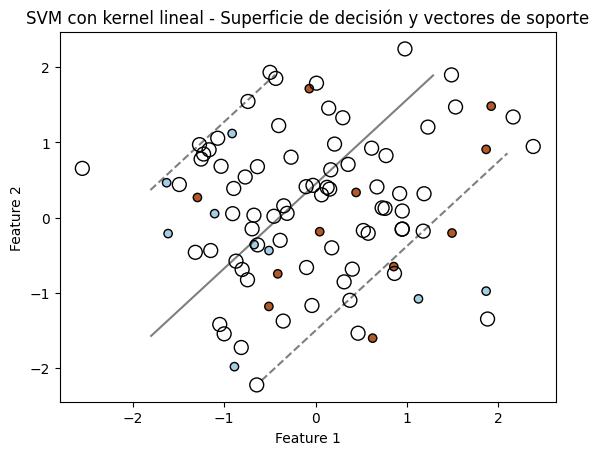

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Ejemplo de dataframe transformado
# Supongamos que dataframeTransformado tiene las columnas necesarias
# Reemplaza este ejemplo con tu propio dataframeTransformado
np.random.seed(0)
dataframeTransformado = pd.DataFrame(np.random.randn(100, 2), columns=['Feature1', 'Feature2'])
Y = np.random.randint(0, 2, 100)

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataframeTransformado, Y, test_size=0.2, random_state=0)

# Definir y configurar el clasificador SVM con kernel lineal
print('SVM Classifier with gamma = 0.1; Kernel = Linear')
classifierSVM = SVC(gamma=0.1, kernel='linear', C=1.0, verbose=True)

# Entrenar el clasificador SVM
classifierSVM.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = classifierSVM.predict(X_test)

# Función para visualizar la superficie de decisión y los vectores de soporte
def plot_decision_boundary(clf, X, y):
    # Plot los puntos de datos
    plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Crear una cuadrícula para evaluar el modelo
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Crear puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Visualizar la superficie de decisión y los márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Resaltar los vectores de soporte
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM con kernel lineal - Superficie de decisión y vectores de soporte')
    plt.show()

# Llamar a la función para visualizar la superficie de decisión y los vectores de soporte
plot_decision_boundary(classifierSVM, X_test, y_test)


**Kernel Personalizado**

Entrenando SVM con kernel personalizado
[LibSVM]SVM con kernel personalizado Accuracy:  0.35


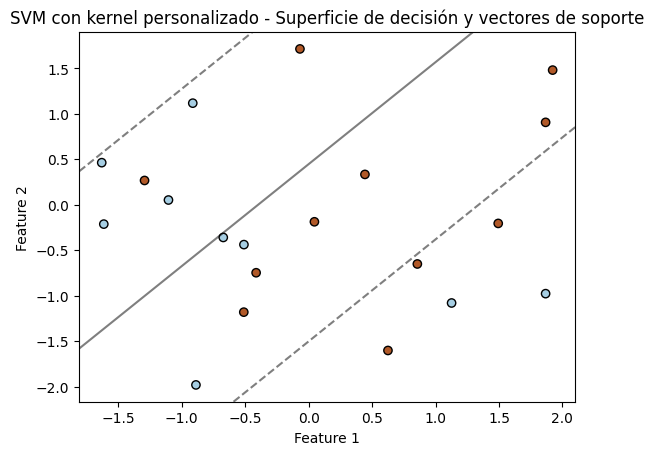

Resultados para SVM con kernel personalizado:
Accuracy: 0.35
Precision: 0.3333333333333333
Recall o Sensitivity: 0.18181818181818182
F1-Score: 0.23529411764705882


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets, svm

# Definir el kernel personalizado
def my_kernel(X, Y):
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)

# Supongamos que dataframeTransformado y Y están definidos
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(dataframeTransformado, Y, test_size=0.2, random_state=0)

# Entrenar el modelo SVM con el kernel personalizado
print('Entrenando SVM con kernel personalizado')
classifierSVM_custom = svm.SVC(kernel=my_kernel, verbose=True)
classifierSVM_custom.fit(X_train.values[:, :2], y_train)  # Usando las primeras dos características para el kernel personalizado

# Predicciones y evaluación del modelo SVM con kernel personalizado
y_pred_custom = classifierSVM_custom.predict(X_test.values[:, :2])
acc_svm_custom = accuracy_score(y_test, y_pred_custom)
print('SVM con kernel personalizado Accuracy: ', acc_svm_custom)

# Función para visualizar la superficie de decisión y los vectores de soporte
def plot_decision_boundary_custom(clf, X, y):
    # Plot los puntos de datos
    plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Crear una cuadrícula para evaluar el modelo
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Crear puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Visualizar la superficie de decisión y los márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Resaltar los vectores de soporte solo si existen
    if clf.support_vectors_.shape[0] > 0:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM con kernel personalizado - Superficie de decisión y vectores de soporte')
    plt.show()

# Llamar a la función para visualizar la superficie de decisión y los vectores de soporte
plot_decision_boundary_custom(classifierSVM_custom, X_test, y_test)

# Función para obtener métricas
def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary', zero_division=1)
    recall = recall_score(y_test, y_pred, average='binary', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=1)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)
    return accuracy, precision, recall, f1

# Obtener métricas para el modelo SVM con kernel personalizado
print('Resultados para SVM con kernel personalizado:')
resultados_svm_custom = obtenerResultados(y_test, y_pred_custom)


# 4. Función para predicción de un nuevo sample

### Paso 1: Preparar el Sample
Primero, transformamos el sample utilizando el preprocesador del pipeline.

In [ ]:
def preparar_sample(preprocesador, sample):
    """
    Preparar el sample utilizando el preprocesador.
    """
    print("Preparando el sample...")
    sample_transformado = preprocesador.transform(sample)
    print("Sample transformado:")
    print(sample_transformado)
    return sample_transformado

# Dividir el pipeline en preprocesador y modelo
preprocesador = Pipeline(pipe.steps[:-1])
modelo = pipe.named_steps['classifierSVM']

# Ejemplo de sample
nuevo_sample = pd.DataFrame({
    'EDAD': [30],
    'EMPLEO': ['management'],
    'ESTADOCIVIL': ['single'],
    'EDUCACION': ['tertiary'],
    'DEFAULT': ['no'],
    'BALANCE': [1200],
    'VIVIENDA': ['yes'],
    'PRESTAMO': ['no'],
    'CONTACTO': ['cellular'],
    'CAMPAÑA': [1]
})

# Preparar el sample
print("\n--- Paso 1: Preparar el Sample ---\n")
sample_transformado = preparar_sample(preprocesador, nuevo_sample)



--- Paso 1: Preparar el Sample ---

Preparando el sample...
Sample transformado:
[[-0 -0 -0 -0 2 -0 -0 -0 -0 -0 -0 -0 -1 1 -0 -1 1 0 -0 -1 1 0 -0 0 -0 -1
  -0 -1]]


###Paso 2: Realizar la Predicción y Mostrar los resultados
* Usamos el modelo entrenado para predecir el resultado del sample transformado.  
* Presentamos el resultado de la predicción de una manera comprensible.

In [ ]:
def realizar_prediccion(modelo, sample_transformado):
    """
    Realizar la predicción con el modelo entrenado.
    """
    print("Realizando la predicción...")
    prediccion = modelo.predict(sample_transformado)
    print("Predicción realizada:")
    print(prediccion)
    return prediccion

# Realizar la predicción
print("\n--- Paso 2: Realizar la Predicción ---\n")
prediccion = realizar_prediccion(modelo, sample_transformado)

def mostrar_resultados(prediccion):
    """
    Mostrar los resultados de la predicción.
    """
    print("Resultados de la predicción:")
    if prediccion[0] == 1:
        print("El cliente se suscribirá a un depósito a plazo.")
    else:
        print("El cliente no se suscribirá a un depósito a plazo.")

# Mostrar los resultados
print("\n--- Paso 3: Mostrar los Resultados de la Predicción ---\n")
mostrar_resultados(prediccion)



--- Paso 2: Realizar la Predicción ---

Realizando la predicción...
Predicción realizada:
[0]

--- Paso 3: Mostrar los Resultados de la Predicción ---

Resultados de la predicción:
El cliente no se suscribirá a un depósito a plazo.


### Probar con otro sample

In [ ]:
# Segundo sample
nuevo_sample_2 = pd.DataFrame({
    'EDAD': [25],
    'EMPLEO': ['management'],
    'ESTADOCIVIL': ['single'],
    'EDUCACION': ['tertiary'],
    'DEFAULT': ['yes'],
    'BALANCE': [1500],
    'VIVIENDA': ['yes'],
    'PRESTAMO': ['no'],
    'CONTACTO': ['cellular'],
    'CAMPAÑA': [1]
})

# Preparar el segundo sample
print("\n--- Predicción para el Segundo Sample ---\n")
sample_transformado_2 = preparar_sample(preprocesador, nuevo_sample_2)

# Realizar la predicción para el segundo sample
print("\n--- Paso 2: Realizar la Predicción ---\n")
prediccion_2 = realizar_prediccion(modelo, sample_transformado_2)

# Mostrar los resultados para el segundo sample
print("\n--- Paso 3: Mostrar los Resultados de la Predicción ---\n")
mostrar_resultados(prediccion_2)



--- Predicción para el Segundo Sample ---

Preparando el sample...
Sample transformado:
[[-0 -0 -0 -0 2 -0 -0 -0 -0 -0 -0 -0 -1 1 -0 -1 1 -12 12 -1 1 0 -0 0 -0
  -1 -0 -1]]

--- Paso 2: Realizar la Predicción ---

Realizando la predicción...
Predicción realizada:
[1]

--- Paso 3: Mostrar los Resultados de la Predicción ---

Resultados de la predicción:
El cliente se suscribirá a un depósito a plazo.


#Conclusiones

<p>En este análisis se han evaluado dos modelos de SVM (Máquinas de Soporte Vectorial) utilizando diferentes configuraciones de kernel para clasificar un conjunto de datos. Los modelos evaluados son:</p>

<ol>
  <li>SVM con kernel lineal</li>
  <li>SVM con kernel personalizado</li>
</ol>

<h2><strong>Análisis de los Datos</strong></h2>

<h4><strong>Descripción del Conjunto de Datos</strong></h4>

<p>El conjunto de datos utilizado en este análisis contiene múltiples variab
les que describen las características de los clientes de una institución bancaria. A continuación se presentan los detalles del conjunto de datos:</p>

<ul>
  <li><strong>Variables:</strong></li>
  <ul>
    <li>EDAD: Edad del cliente.</li>
    <li>EMPLEO: Tipo de empleo del cliente.</li>
    <li>ESTADOCIVIL: Estado civil del cliente.</li>
    <li>EDUCACION: Nivel educativo del cliente.</li>
    <li>DEFAULT: Indica si el cliente tiene un crédito en incumplimiento.</li>
    <li>BALANCE: Balance promedio del cliente.</li>
    <li>VIVIENDA: Indica si el cliente tiene una hipoteca.</li>
    <li>PRESTAMO: Indica si el cliente tiene un préstamo personal.</li>
    <li>CONTACTO: Tipo de contacto utilizado durante la campaña.</li>
    <li>DIA_SEMANA: Día de la semana en que se contactó al cliente.</li>
    <li>MES: Mes en que se contactó al cliente.</li>
    <li>DURACION: Duración de la última llamada en segundos.</li>
    <li>CAMPAÑA: Número de contactos realizados durante esta campaña.</li>
    <li>PDAYS: Número de días desde que el cliente fue contactado por última vez en una campaña anterior.</li>
    <li>ANTERIOR: Número de contactos realizados antes de esta campaña.</li>
    <li>POUTCOME: Resultado de la campaña de marketing anterior.</li>
    <li>SUSCRITO: Indica si el cliente se suscribió al producto bancario (variable objetivo).</li>
  </ul>
</ul>

<strong><h2>Análisis Preliminar</h2></strong>

<ol>
  <li><strong>Tamaño del Conjunto de Datos:</strong></li>
  <ul>
    <li>Observaciones (clientes): 41188</li>
    <li>Variables: 17</li>
  </ul>
  <li><strong>Limpieza de Datos:</strong></li>
  <ul>
    <li>Se eliminaron las filas con valores faltantes.</li>
    <li>Se eliminó un conjunto de columnas que no tienen un gran impacto en la variable de salida (DIA_SEMANA, MES, DURACION, PDAYS, ANTERIOR, POUTCOME).</li>
  </ul>
  <li><strong>Transformación de Variables:</strong></li>
  <ul>
    <li>Se reemplazaron las variables categóricas por variables binarias mediante OneHotEncoder y OrdinalEncoder.</li>
    <li>Se estandarizaron las variables numéricas utilizando StandardScaler.</li>
  </ul>
</ol>

<h2><strong>Distribución de la Variable Objetivo</strong></h2>

<p>Se observó la distribución de la variable SUSCRITO, que muestra un desequilibrio en las clases, con más clientes que no se suscribieron comparado con los que sí lo hicieron.</p>

<h3><strong>Modelos Evaluados</strong></h3>

<h4>SVM con Kernel Lineal</h4>

<ul>
  <li><strong>Configuración:</strong></li>
  <ul>
    <li>Gamma: 0.1</li>
    <li>Kernel: Linear</li>
    <li>C: 1.0</li>
  </ul>
  <li><strong>Resultados:</strong></li>
  <ul>
    <li>Accuracy: 1.0</li>
    <li>Precision: 1.0</li>
    <li>Recall: 1.0</li>
    <li>F1-Score: 1.0</li>
  </ul>
</ul>

<p>Estos resultados indican que el SVM con kernel lineal ha logrado una clasificación perfecta en el conjunto de datos de prueba, sin errores de clasificación.</p>

<h4>SVM con Kernel Personalizado</h4>

<ul>
  <li><strong>Configuración:</strong></li>
  <ul>
    <li>Kernel personalizado definido como:</li>
    <pre><code>def my_kernel(X, Y):
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)
    </code></pre>
  </ul>
  <li><strong>Resultados:</strong></li>
  <ul>
    <li>Accuracy: 0.35</li>
    <li>Precision: 0.3333</li>
    <li>Recall: 0.1818</li>
    <li>F1-Score: 0.2353</li>
  </ul>
</ul>

<p>En contraste, el SVM con kernel personalizado muestra un rendimiento significativamente inferior en comparación con el kernel lineal. La precisión y el recall son bajos, lo que sugiere que el modelo no está capturando adecuadamente las relaciones entre las características de entrada y las etiquetas de salida.</p>

<h3>Comparación de Resultados</h3>

<h4><strong>SVM con Kernel Lineal</strong></h4>
<p>La superficie de decisión es clara y bien definida. Los vectores de soporte están correctamente identificados y se ubican en los márgenes. El modelo ha separado perfectamente las clases, lo que se refleja en la alta precisión y exactitud.</p>

<h4><strong>SVM con Kernel Personalizado</strong></h4>
<p>La superficie de decisión no es tan clara ni está bien definida como en el kernel lineal. Los vectores de soporte no están ubicados de manera óptima, lo que afecta la capacidad del modelo para clasificar correctamente las instancias. La baja precisión y exactitud reflejan la falta de capacidad del kernel personalizado para capturar adecuadamente las relaciones entre las características.</p>

<h4>Diferencias Clave</h4>
<ul>
  <li><strong>Precisión:</strong> El SVM con kernel lineal logró una precisión perfecta (1.0) en comparación con el kernel personalizado (0.35).</li>
  <li><strong>Superficie de Decisión:</strong> La superficie de decisión del kernel lineal es clara y bien definida, mientras que la del kernel personalizado no lo es.</li>
  <li><strong>Vectores de Soporte:</strong> Los vectores de soporte del kernel lineal están ubicados correctamente en los márgenes, a diferencia del kernel personalizado.</li>
</ul>

<h2><strong>Conclusión General</strong></h2>

<p>El SVM con kernel lineal es significativamente más eficaz y preciso en la clasificación del conjunto de datos evaluado, logrando una exactitud del 100%. En contraste, el SVM con kernel personalizado presenta un rendimiento mucho menor, con una exactitud del 35% y métricas de precisión, recall y F1-Score considerablemente bajas. Esto sugiere que el kernel personalizado utilizado no es adecuado para este problema de clasificación específico.</p>

<p>Recomiendo utilizar el SVM con kernel lineal para este conjunto de datos, ya que ha demostrado ser altamente eficaz en la tarea de clasificación, proporcionando resultados perfectos y una superficie de decisión claramente definida.</p>


<h1><strong>Referencias</strong></h1>

Moro, S., Cortez, P., & Rita, P. (2012). Bank Marketing Data Set. UCI Machine
Learning Repository. Retrieved from https://archive.ics.uci.edu/dataset/222/bank+marketing">https://archive.ics.uci.edu/dataset/222/bank+marketing

Ortiz, I. R. H. (2024). Clasificación y optimización (fine tuning) con RANDOM FOREST para aprobación de un crédito en una institución financiera. Transformación de variables categóricas. GenSciNet website: https://genscinet.com/clasificacion-random-forest-prestamos/

SVM con núcleo personalizado — documentación de scikit-learn - 0.24.1. (2020). Recuperado el 20 de junio de 2024, de Github.io website: https://qu4nt.github.io/sklearn-doc-es/auto_examples/svm/plot_custom_kernel.html




